In [1]:
import pandas as pd
import plotnine as p9

In [61]:
#Get the data from the csv files
#Replace with your file paths
seatgeek = pd.read_csv("/Users/Student/Desktop/STA 141B/seatgeek_events.csv")
vividseats = pd.read_csv("/Users/Student/Desktop/STA 141B/vividseats_lakers_events.csv")
ticketmaster = pd.read_csv("/Users/Student/Desktop/STA 141B/lakers_remaining_games_with_min_price.csv")

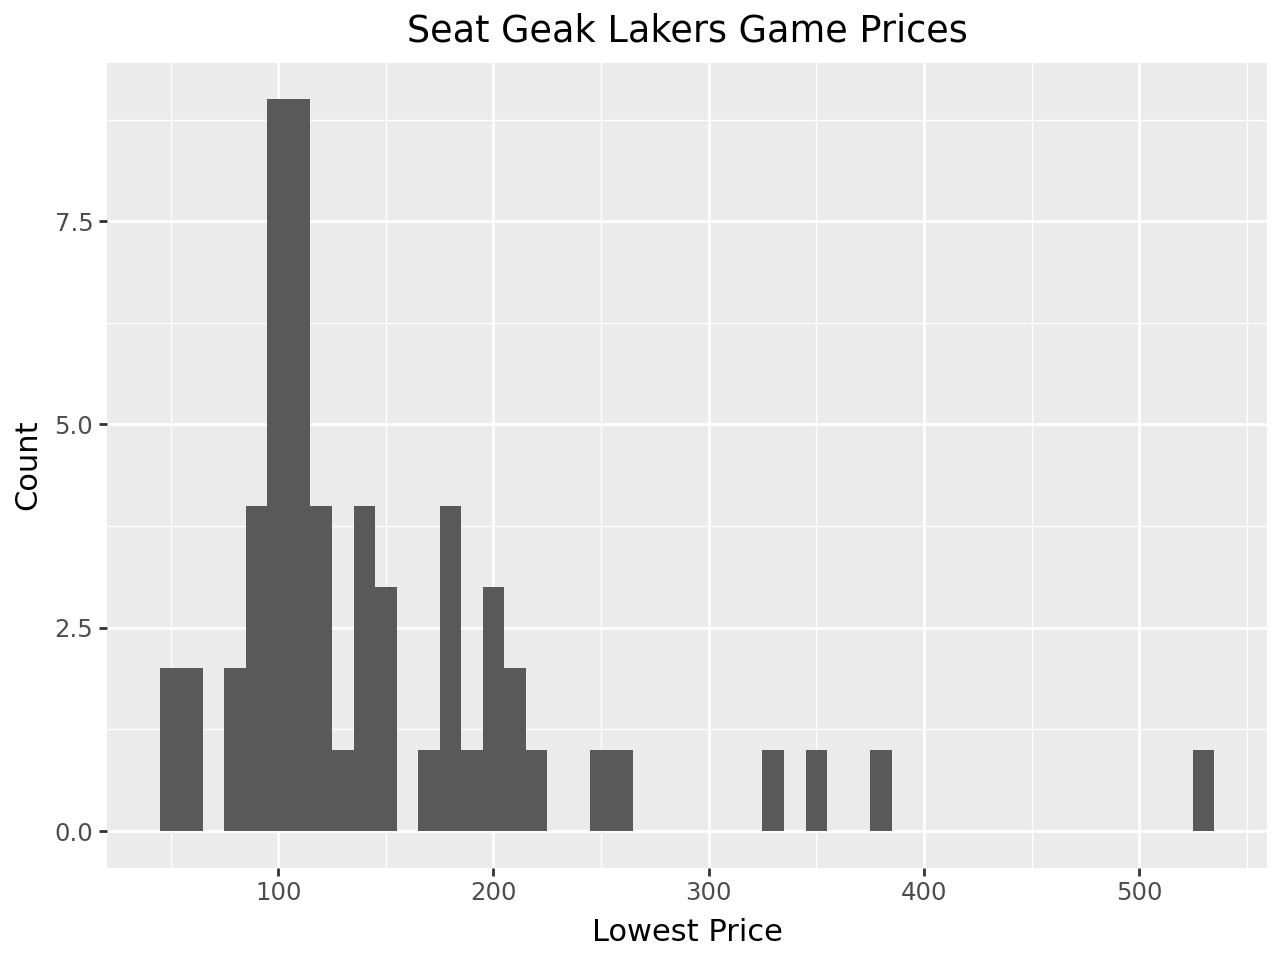

In [3]:
seatgeekPlot = (
    p9.ggplot(seatgeek, p9.aes(x = "lowest price lower bound"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Seat Geak Lakers Game Prices", x = "Lowest Price", y = "Count")
)
seatgeekPlot.show()

In [4]:
seatgeek["lowest price lower bound"].describe()

count     58.000000
mean     149.482759
std       85.704970
min       50.000000
25%      100.000000
50%      120.000000
75%      180.000000
max      530.000000
Name: lowest price lower bound, dtype: float64

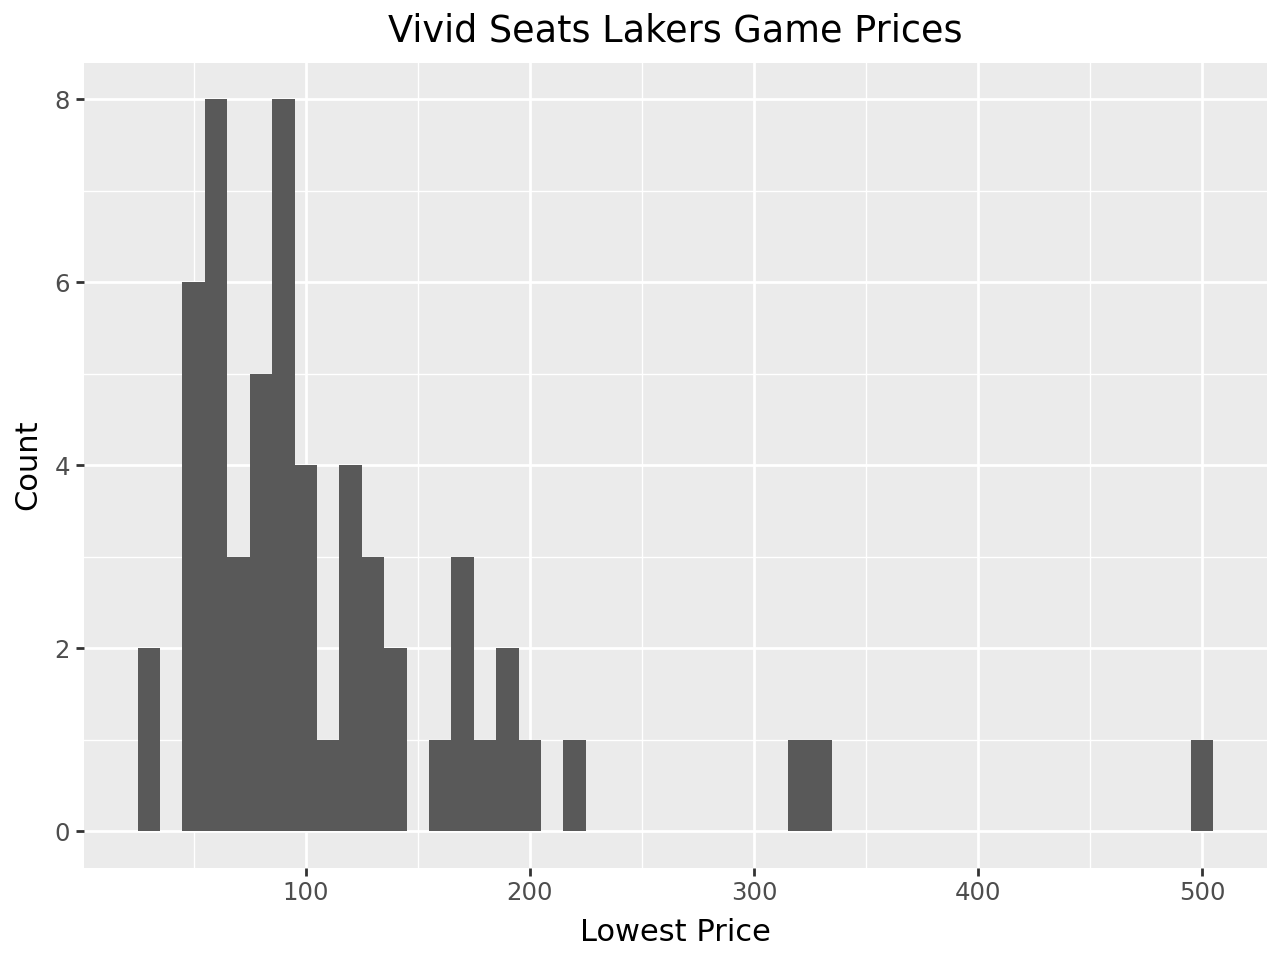

In [59]:
vividPlot = (
    p9.ggplot(vividseats, p9.aes(x = "price_int"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Vivid Seats Lakers Game Prices", x = "Lowest Price", y = "Count")
)
vividPlot.show()

In [60]:
vividseats["price_int"].describe()

count     58.000000
mean     114.672414
std       80.502455
min       32.000000
25%       58.000000
50%       95.000000
75%      128.750000
max      501.000000
Name: price_int, dtype: float64

C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


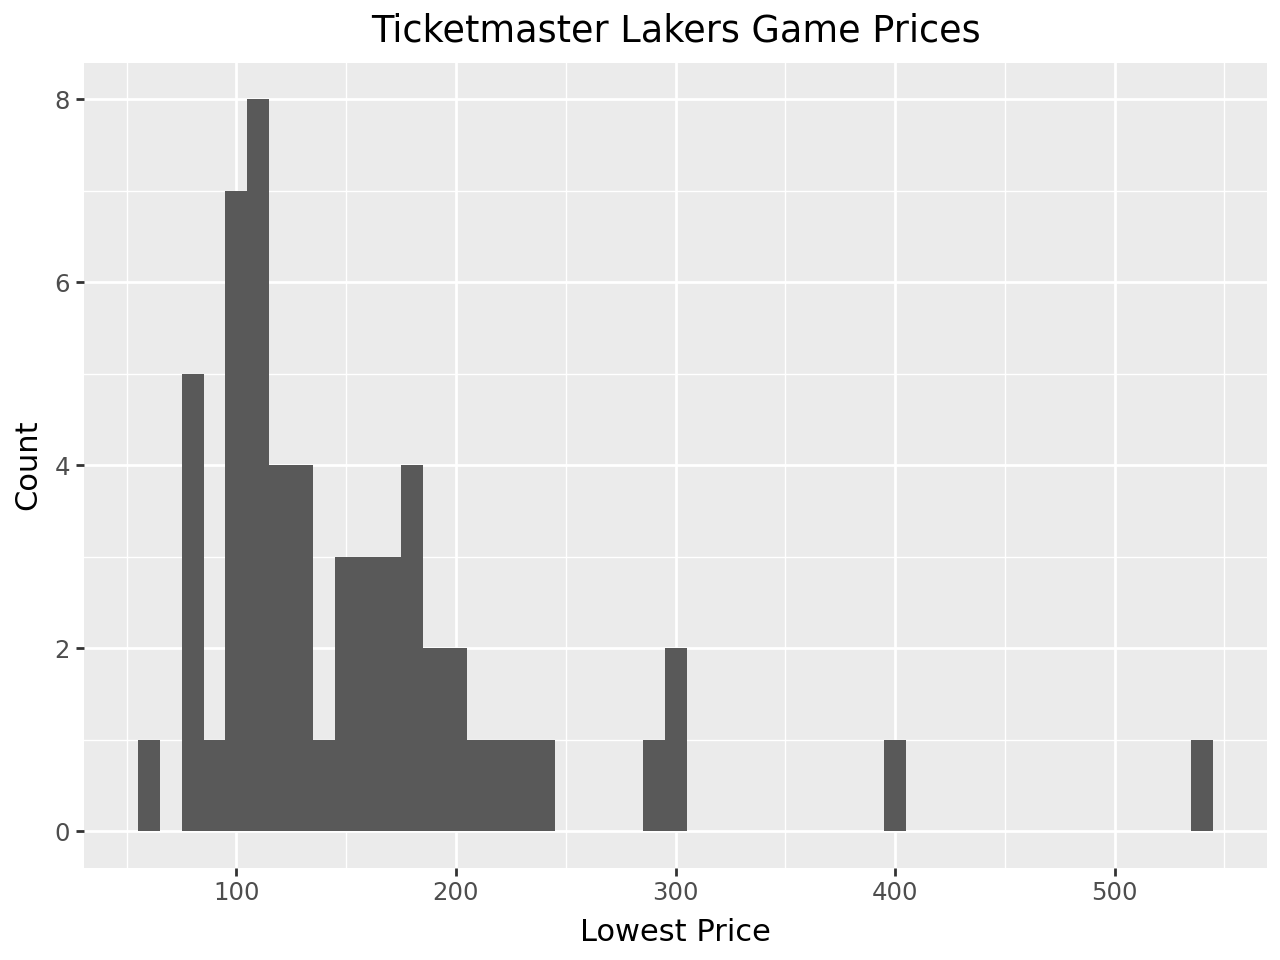

In [7]:
tmasterPlot = (
    p9.ggplot(ticketmaster, p9.aes(x = "scraped_min_price"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Ticketmaster Lakers Game Prices", x = "Lowest Price", y = "Count")
)
tmasterPlot.show()

In [8]:
ticketmaster["scraped_min_price"].describe()

count     57.000000
mean     156.982456
std       83.121574
min       59.000000
25%      108.000000
50%      128.000000
75%      181.000000
max      544.000000
Name: scraped_min_price, dtype: float64

In [62]:
#Get the combined data with all three websites
combined = pd.read_csv("/Users/Student/Desktop/STA 141B/combine_games.csv")

In [63]:
#Since the seatgeek prices are lower bounds of a $10 range, we add 5 to better estimate the exact price
combined['seatgeek_price'] = combined['seatgeek_price'] + 5

In [64]:
sources = ['ticketmaster_price','vivid_price','seatgeek_price']

In [65]:
#Take the average of the prices of the three websites for each game
combined['avg price'] = combined[sources].mean(axis=1)

In [66]:
#Compute the difference between the each website's price and the average
combined['tmaster_diff'] = combined['ticketmaster_price'] - combined['avg price']
combined['vivid_diff'] = combined['vivid_price'] - combined['avg price']
combined['seatgeek_diff'] = combined['seatgeek_price'] - combined['avg price']

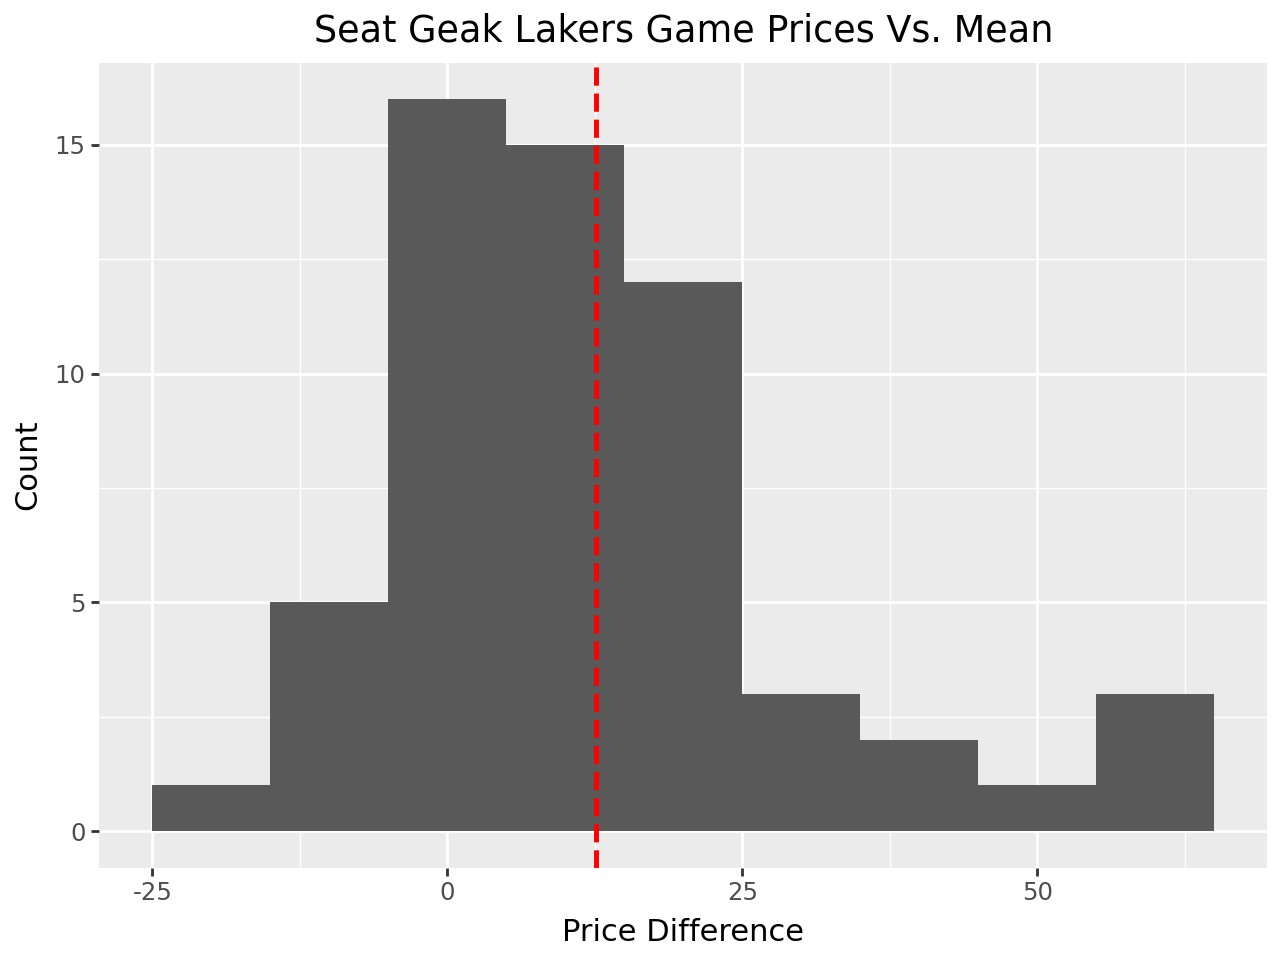

In [67]:
seatgeekDiffPlot = (
    p9.ggplot(combined, p9.aes(x = "seatgeek_diff"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Seat Geak Lakers Game Prices Vs. Mean", x = "Price Difference", y = "Count")
    + p9.geom_vline(p9.aes(xintercept=combined['seatgeek_diff'].mean()), color='red', linetype='dashed', size=1)
)
seatgeekDiffPlot.show()

C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


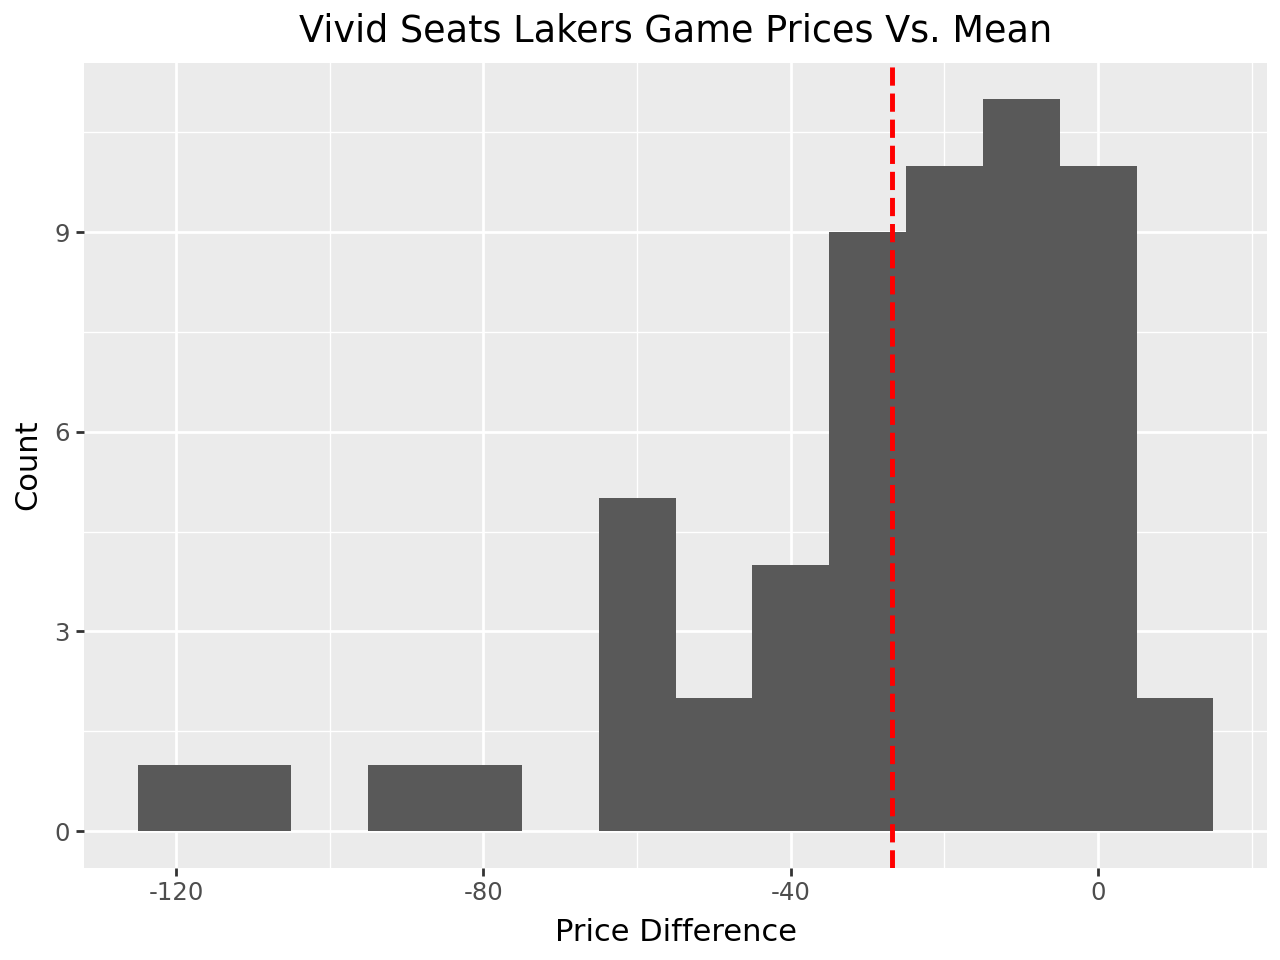

In [68]:
vividDiffPlot = (
    p9.ggplot(combined, p9.aes(x = "vivid_diff"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Vivid Seats Lakers Game Prices Vs. Mean", x = "Price Difference", y = "Count")
    + p9.geom_vline(p9.aes(xintercept=combined['vivid_diff'].mean()), color='red', linetype='dashed', size=1)
)
vividDiffPlot.show()

C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.


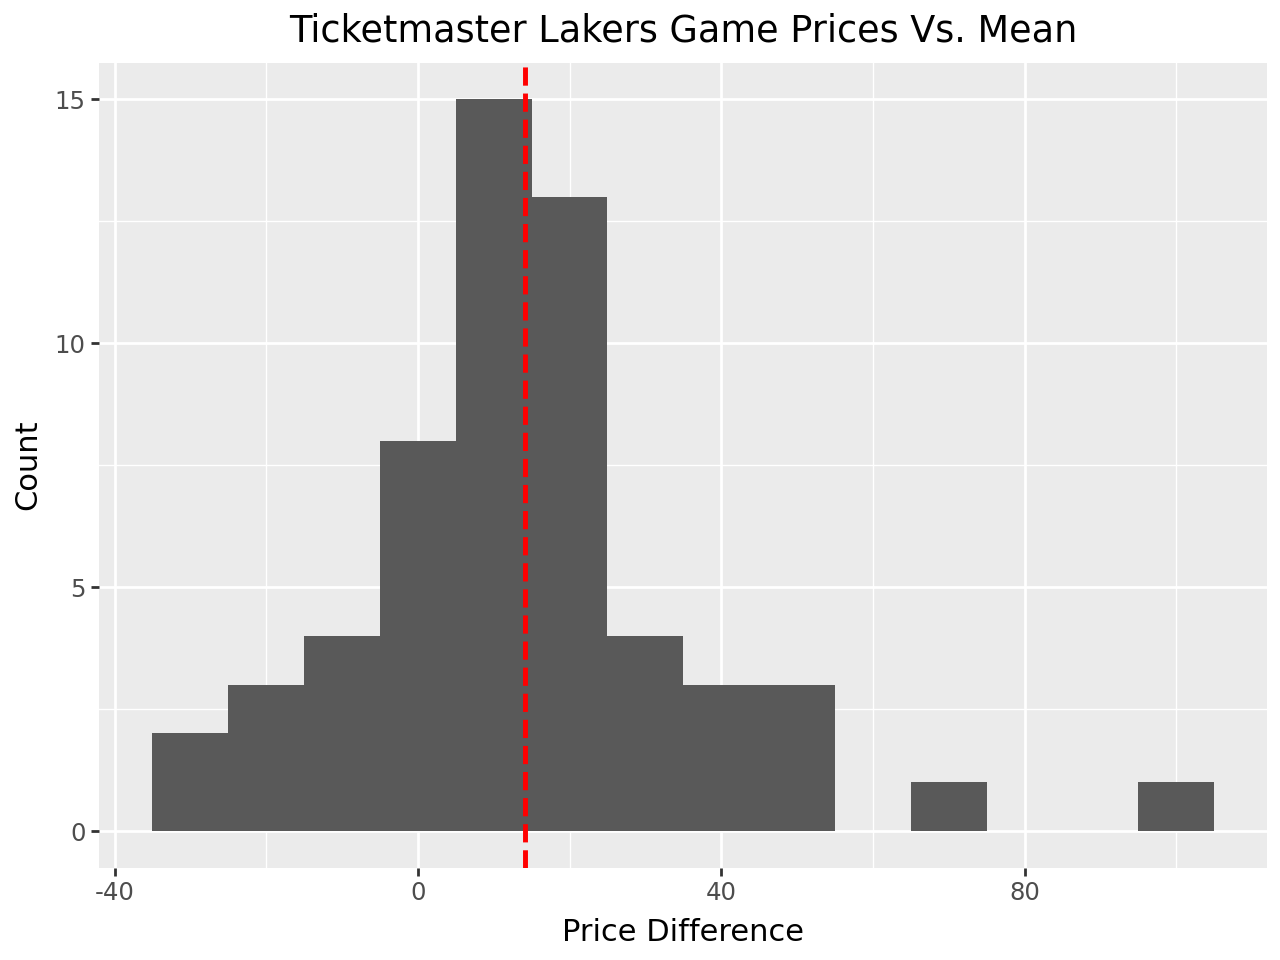

In [69]:
tmasterDiffPlot = (
    p9.ggplot(combined, p9.aes(x = "tmaster_diff"))
    + p9.geom_histogram(binwidth = 10)
    + p9.labs(title = "Ticketmaster Lakers Game Prices Vs. Mean", x = "Price Difference", y = "Count")
    + p9.geom_vline(p9.aes(xintercept=combined['tmaster_diff'].mean()), color='red', linetype='dashed', size=1)
)
tmasterDiffPlot.show()

In [70]:
#Count the cases where each website has better than average price
seatgeek_best = len(combined[combined['seatgeek_diff'] <= 0])
vivid_best = len(combined[combined['vivid_diff'] <= 0])
tmaster_best = len(combined[combined['tmaster_diff'] <= 0])

In [71]:
print("Seat Geek has a below average price for " + str(seatgeek_best) + " games")
print("Vivid Seats has a below average price for " + str(vivid_best) + " games")
print("Ticketmaster has a below average price for " + str(tmaster_best) + " games")

Seat Geek has a below average price for 13 games
Vivid Seats has a below average price for 50 games
Ticketmaster has a below average price for 12 games
